<a href="https://colab.research.google.com/github/talhanadeem-7/Diabetes_Prediction_with_ML/blob/main/Daibetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Load the dataset**

In [12]:
try:
    df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
    print("Dataset loaded successfully!")
    # View first 5 rows
    display(df.head())
except FileNotFoundError:
    print("File not found! Make sure the file is in your directory.")

Dataset loaded successfully!


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Dataset Inspection**

In [13]:
# Show initial dataset info
if 'df' in locals() and not df.empty:
    print(f"Total rows before removing duplicates: {df.shape[0]}")

    # Check and remove duplicate rows
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows found: {duplicate_count}")

    # Drop duplicates
    df = df.drop_duplicates()

    # Show updated dataset info
    print(f"Total rows after removing duplicates: {df.shape[0]}")

    print("\nSummary statistics for numerical columns:")
    display(df.describe())

    print("Column names in the dataset:")
    print(df.columns.tolist())
else:
    print("DataFrame 'df' not loaded or is empty. Skipping dataset inspection.")

Total rows before removing duplicates: 253680
Number of duplicate rows found: 23899
Total rows after removing duplicates: 229781

Summary statistics for numerical columns:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Column names in the dataset:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


**Target Distribution**

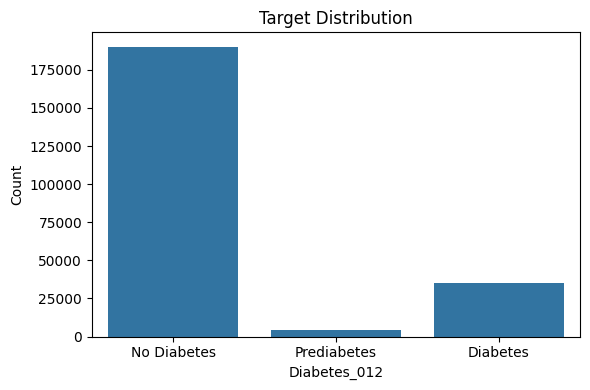

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Diabetes_012")
plt.title("Target Distribution")
plt.xlabel("Diabetes_012")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["No Diabetes", "Prediabetes", "Diabetes"])  # Based on UCI info
plt.tight_layout()
plt.show()

**Visualize key numerical values**

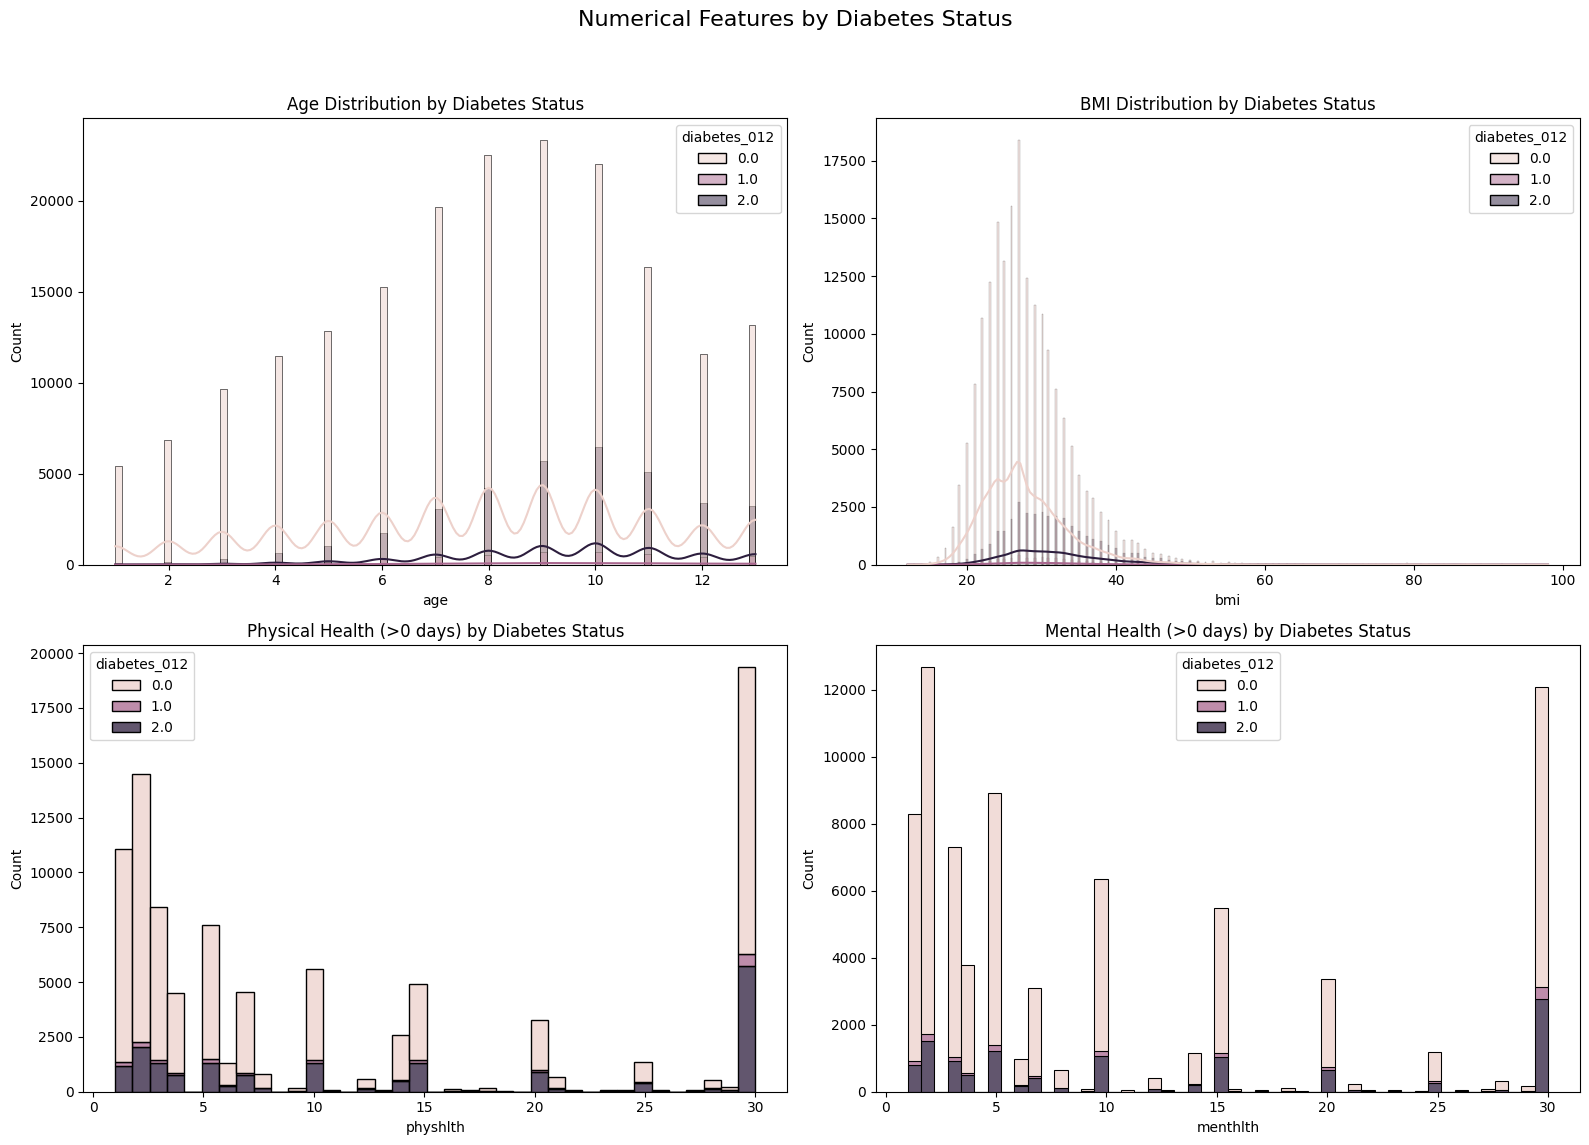

In [15]:
# Rename columns to lowercase for consistency
df.rename(columns=str.lower, inplace=True)

# Filter out zero values for physical and mental health for better visualization
filtered_df = df[(df['physhlth'] > 0) | (df['menthlth'] > 0)]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Numerical Features by Diabetes Status', fontsize=16)

# Age - use full dataset
sns.histplot(data=df, x='age', hue='diabetes_012', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Diabetes Status')

# BMI - use full dataset
sns.histplot(data=df, x='bmi', hue='diabetes_012', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Diabetes Status')

# Physical Health - filtered to > 0 days
sns.histplot(data=filtered_df[filtered_df['physhlth'] > 0],
             x='physhlth', hue='diabetes_012', multiple="stack", ax=axes[1, 0])
axes[1, 0].set_title('Physical Health (>0 days) by Diabetes Status')

# Mental Health - filtered to > 0 days
sns.histplot(data=filtered_df[filtered_df['menthlth'] > 0],
             x='menthlth', hue='diabetes_012', multiple="stack", ax=axes[1, 1])
axes[1, 1].set_title('Mental Health (>0 days) by Diabetes Status')

# Final layout adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Data preparation and split**

In [16]:
# Define features and target
X = df.drop(columns=["diabetes_012"])
y = df["diabetes_012"]

# feature types
numeric_features = X.select_dtypes(include='number').columns.tolist()

print("\nNumerical features:", numeric_features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)]
)


Numerical features: ['highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth', 'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income']

Training shape: (160846, 21)
Testing shape: (68935, 21)


**Create Pre-processing transformers**

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scale numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encode categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ],
    remainder='passthrough'  # Keep any other columns not specified
)

**Train and evaluate models**


--- Logistic Regression ---
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.54      0.17      0.26     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.38      0.39     68935
weighted avg       0.78      0.83      0.79     68935



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


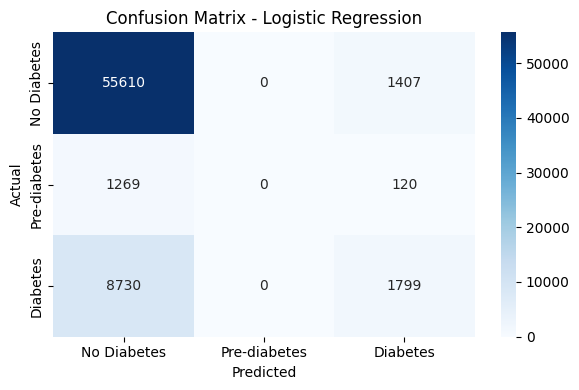


--- Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     57017
         1.0       0.03      0.03      0.03      1389
         2.0       0.28      0.31      0.30     10529

    accuracy                           0.74     68935
   macro avg       0.39      0.39      0.39     68935
weighted avg       0.75      0.74      0.75     68935



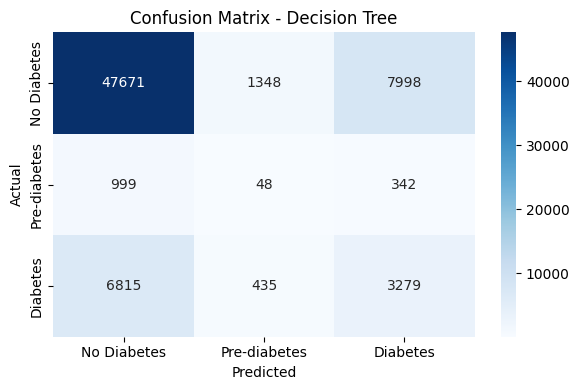


--- Random Forest ---
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.47      0.19      0.27     10529

    accuracy                           0.82     68935
   macro avg       0.44      0.38      0.39     68935
weighted avg       0.77      0.82      0.79     68935



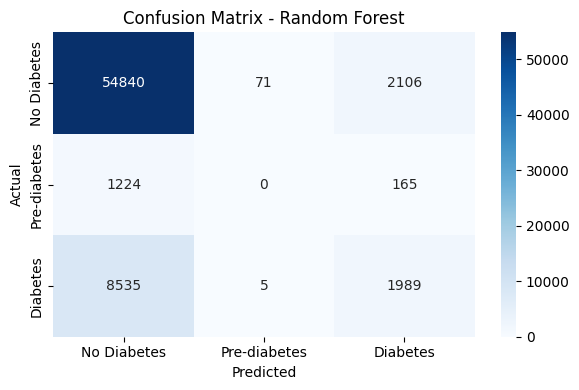

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.56      0.20      0.29     10529

    accuracy                           0.84     68935
   macro avg       0.47      0.39      0.40     68935
weighted avg       0.79      0.84      0.80     68935



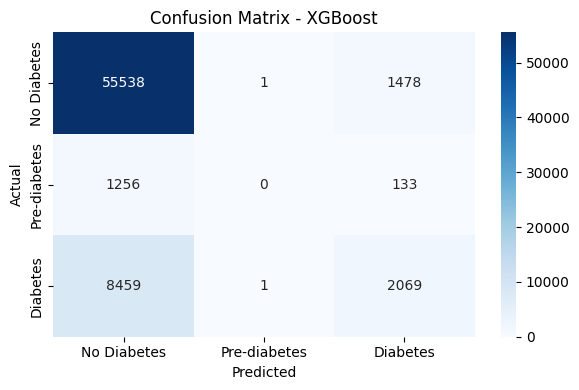

In [19]:
# Define models to test
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store evaluation results
results = {}

# Loop through each model
for name, model in models.items():
    # Full pipeline: preprocessing + model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit model
    model_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)  # DO NOT slice with [:, 1] for multiclass

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

    # Report
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Pre-diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

**Compare all models**

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
XGBoost              0.835671   0.789844  0.835671  0.795870  0.756409
Logistic Regression  0.832799   0.783673  0.832799  0.789844  0.755589
Random Forest        0.824385   0.773474  0.824385  0.787020  0.714120
Decision Tree        0.739798   0.754262  0.739798  0.746779  0.558513


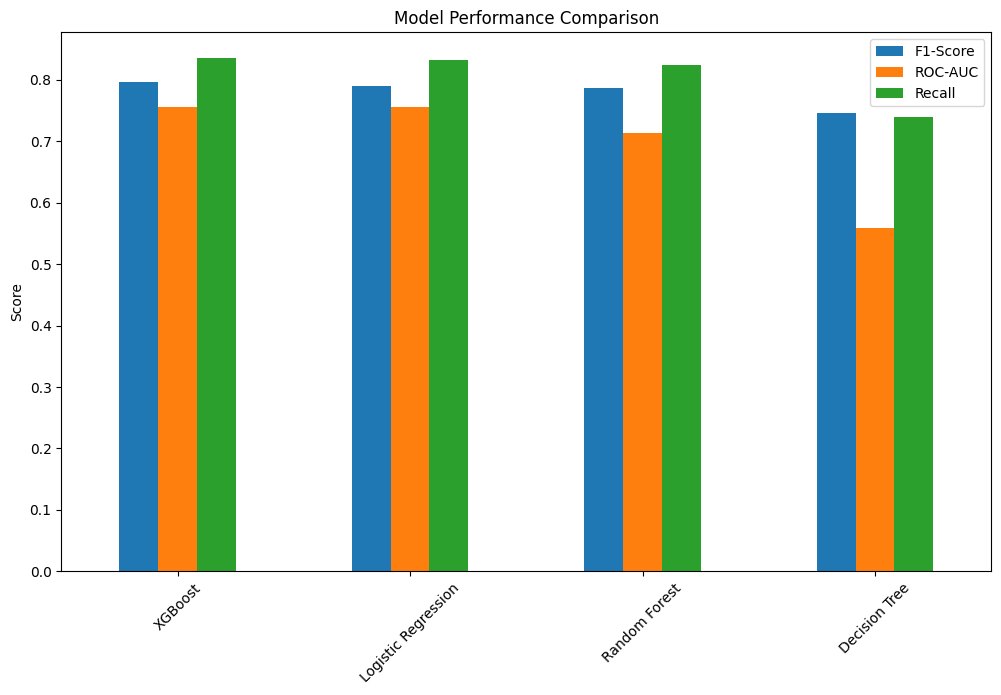

In [20]:
# Convert to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="F1-Score", ascending=False)
print(results_df)

# Plot comparison
results_df[['F1-Score', 'ROC-AUC', 'Recall']].plot(
    kind='bar',
    figsize=(12, 7),
    title='Model Performance Comparison'
)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

**Test Impact of Data Size**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:26:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:26:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



F1-Score by Training Data Size:

Model          Logistic Regression   XGBoost
Training Size                               
30%                       0.788049  0.792001
50%                       0.789154  0.793372
70%                       0.789535  0.794424
100%                      0.789844  0.795870


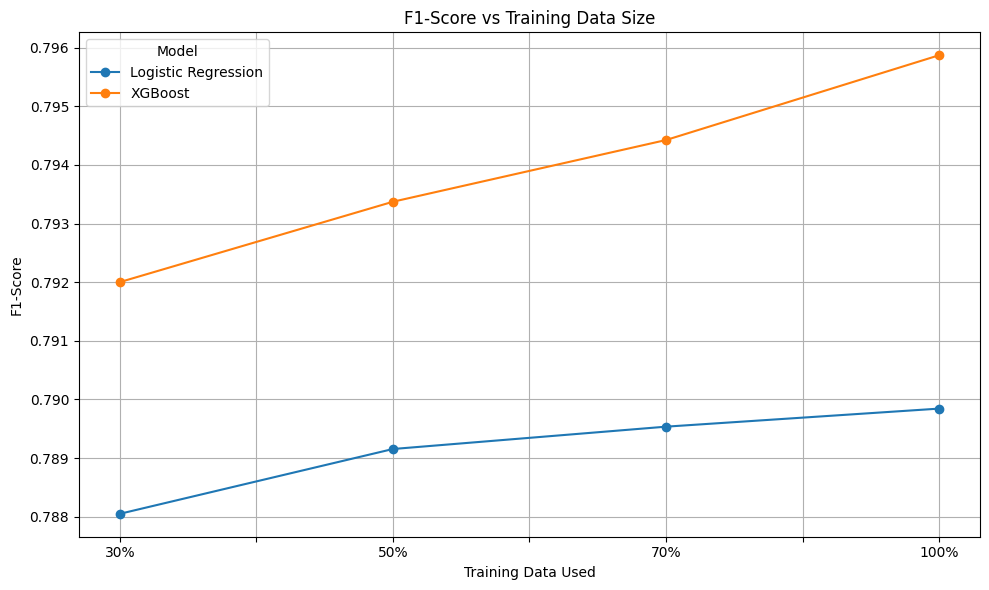

In [22]:
train_sizes = [0.3, 0.5, 0.7, 1.0]
results_data_size = []

# Compare simple vs complex model
models_to_test = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Loop through sizes
for name, model in models_to_test.items():
    for size in train_sizes:
        subset_size = int(size * len(X_train))
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train_subset, y_train_subset)

        y_pred = pipeline.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results_data_size.append({
            "Model": name,
            "Training Size": f"{int(size*100)}%",
            "F1-Score": f1
        })

# Create pivot table
data_size_df = pd.DataFrame(results_data_size)
pivot_df = data_size_df.pivot(index='Training Size', columns='Model', values='F1-Score').reindex([f"{int(s*100)}%" for s in train_sizes])

# Display results
print("\nF1-Score by Training Data Size:\n")
print(pivot_df)

# Plot results
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('F1-Score vs Training Data Size')
plt.ylabel('F1-Score')
plt.xlabel('Training Data Used')
plt.grid(True)
plt.tight_layout()
plt.show()

**Check Overfitting/Underfitting**

In [23]:
# Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='liblinear'))])
lr_pipeline.fit(X_train, y_train)
train_acc_lr = accuracy_score(y_train, lr_pipeline.predict(X_train))
test_acc_lr = accuracy_score(y_test, lr_pipeline.predict(X_test))

# Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
train_acc_rf = accuracy_score(y_train, rf_pipeline.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf_pipeline.predict(X_test))

print("--- Overfitting Analysis ---")
print(f"Logistic Regression | Train Acc: {train_acc_lr:.4f} | Test Acc: {test_acc_lr:.4f}")
print(f"Random Forest       | Train Acc: {train_acc_rf:.4f} | Test Acc: {test_acc_rf:.4f}")

--- Overfitting Analysis ---
Logistic Regression | Train Acc: 0.8312 | Test Acc: 0.8328
Random Forest       | Train Acc: 0.9942 | Test Acc: 0.8244
